<a href="https://colab.research.google.com/github/MamadouBousso/IAProjects/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Un neurone
Un neurone biologique est constitué d'un corps cellulaire, de plusieurs dendrites et d'un seul
axone. Les connexions entre les neurones sont appelées synapses. Le neurone
reçoit des stimuli sur les dendrites, et en cas de stimuli suffisants, le neurone
se déclenche (également connu sous le nom d'activation ou d'excitation) et émet un stimulus sur son  axone, qui est transmis à d'autres neurones qui ont des connexions synaptiques avec
le neurone excité. Les signaux synaptiques peuvent être excitateurs ou inhibiteurs ; c'est-à-dire certains
signaux peuvent empêcher un neurone de se déclencher au lieu de le déclencher.
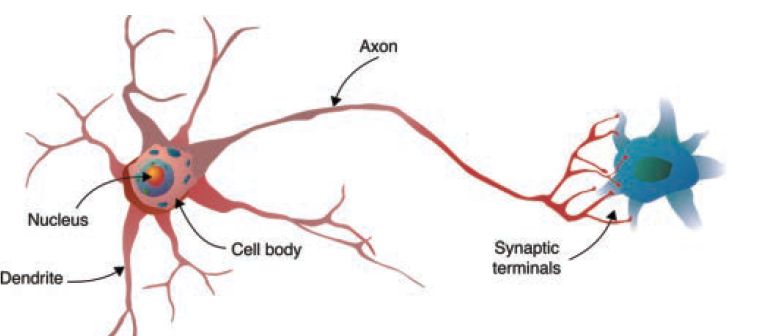

# Algorithme du perceptron

Le perceptron consiste en une unité de calcul, un certain nombre d'entrées, chacun avec un
poids d'entrée et une seule sortie. Le perceptron est illustré à la figure ci-dessous.


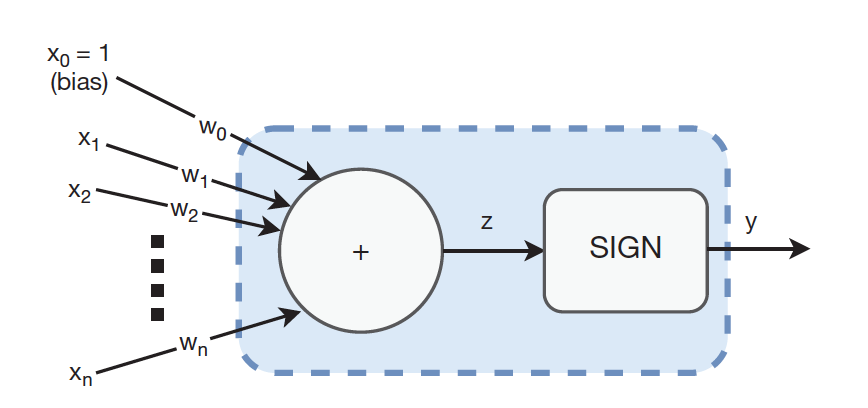

Les entrées sont généralement nommées $ x_0, x_1, . . ., x_n $ dans le cas de n entrées  ($x_0$ étant
l'entrée de polarisation), et la sortie est généralement nommée y.  Chaque entrée a un poids associé
(w_i, où i = 0, . . ., n), historiquement appelé poids synaptique
parce qu'il représente en quelque sorte la force de la connexion d'un neurone
à l'autre, mais de nos jours, il est généralement simplement appelé poids ou poids d'entrée. Pour le
perceptron, la sortie ne peut prendre qu'une des deux valeurs, −1 ou 1. L'entrée de biais est toujours 1. Chaque valeur d'entrée est multipliée par son poids correspondant avant qu'il ne soit présenté à l'unité de calcul (le
rectangle en pointillés avec des coins arrondis dans la figure ci-dessus), qui correspond grossièrement au
corps cellulaire d'un neurone biologique.1 L'unité de calcul calcule la somme des entrées pondérées par leurs poids respectifs, puis applique une fonction dite d'activation, y = f(z), où z
est la somme des entrées pondérées. La fonction d'activation d'un perceptron est le signe
fonction, également connue sous le nom de fonction sign, qui vaut  1 si l'entrée est 
supérieure ou égale à 0 et −1 sinon. La fonction dsign est illustrée à la Figure ci-dessous.
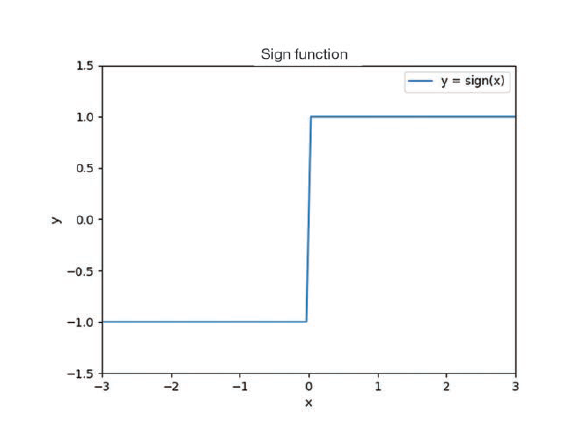

## En résumé 
Le perceptron est définie mathematiquement par les expressions suivantes:



> $ y = f(z)  $


> $ z = \sum_{i=1}^{n} w_ix_i  $


> $ y = 1 \:  si \: z >= 0 \: et  \: y = -1  \: sinon $


> $ x_0 = 1 $ est le biais









In [2]:
import numpy as np
# use pylab for ploting.
import pylab as pl


In [7]:
def compute_prod(w,x):
  """
  w est le vecteur des poids de taille n + 1
  x est le vecteur des entrées de taille n+ 1 avec x0 = 1
  
  Retourne 1 si la somme des produit element par element de w et x est positive et -1 sinon
  """
  z = 0
  result = -1
  for i in range(len(w)):
    z = z + w[i]*x[i]
  if z >= 0:
    result = 1
  
  return result

## Illustration
On considere ce perceptron, calculer son output avec les valeurs fournies
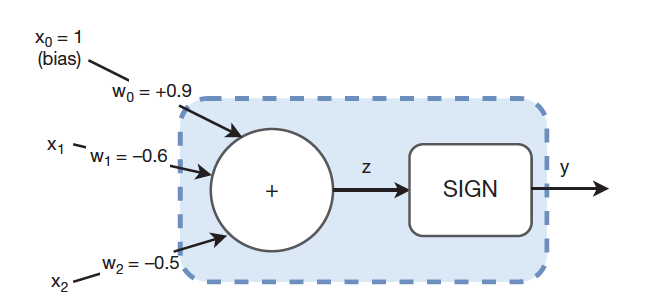

In [8]:
compute_prod([0.9,-0.6,-0.5],[1,12,3])

-1

### Exercice 1
Calculer à la main les valeurs du tableau ci-dessous avec les valeurs de poids suivants: $w_0 = 0.9 $, $ w_1 = -0.6$ et $ w_2 = -0.5 $. Verifier les resultats obtenus avec utilisant la fonction **compute_prod** definie ci-dessus.

| $x_0$ | $x_1$ | $x_2$ |$w_0 x_0$| $w_1 x_1$| $w_2 x_2$| z |y|
| --- | --- | --- |--- |--- |--- |--- |--- |
| 1 | -1 | -1| |  |  |  | |
| 1 | -1 | 1| |  |  |  | |
| 1 | 1 | -1| |  |  |  | |
| 1 | 1 | 1| |  |  |  | |
| -1 | -1 | -1| |  |  |  | |
| -1 | -1 | 1| |  |  |  | |
| -1 | 1 | -1| |  |  |  | |
| -1 | 1 | 1| |  |  |  | |

### Exercice 2
1. Implementer un tableau **AND** avec le perceptron
2. Implementer un tableau **OR** avec le perceptron

### L'apprentissage avec le perceptron
L'algorithme d'apprentissage perceptron est  un algorithme d'apprentissage supervisé. Le modèle est présenté à la fois avec les données d'entrée et des
données de sortie (également appelées vérité terrain). Considérez-le comme un enseignant présentant le
question et réponse au modèle dans l'espoir que le modèle apprendra
qu'une certaine entrée est associée à une sortie correspondante. 

Voyons comment marche cet alorithme:
1. Initialiser les poids aléatoirement
2. Selectionner un input et un output aléatoirement
3. Calculer la valeur de l'output $y$ en utilisant les input et les poids
4. Si  $y$ est différent du veritable output pour ce couple input/output, ajustez les poids de la manière suivante :


> Si $y < 0 $ alors ajouter $\theta w_i$ à chaque $x_i$


> Si $y > 0 $ alors retrancher $\theta w_i$ à chaque $x_i$

5. Répétez les étapes 2, 3 et 4 jusqu'à ce que le perceptron prédit correctement tous les exemples.





Le perceptron a certaines limites à ce qu'il peut prédire, donc pour certains ensembles de
paires d'entrée/sortie, l'algorithme ne convergera pas. Cependant, s'il est possible de
proposer un ensemble de poids qui permet au perceptron de représenter l'ensemble
de paires d'entrée/sortie, alors l'algorithme est assuré de converger en trouvant
ces poids. 

La constante arbitraire $\theta $ est connue sous le nom de taux d'apprentissage et peut
être défini sur ]0,1]. Le taux d'apprentissage est un exemple d'hyperparamètre, qui n'est pas
un paramètre  ajusté par l'algorithme d'apprentissage.

Enfin, à l'étape 4, il peut sembler que tous les poids seront ajustés
du même montant, mais rappelez-vous que l'entrée $x_i$ n'est pas limitée à prendre les
deux valeurs −1 et 1. Il pourrait bien être 0.4 pour une entrée et 0.9 pour une autre, donc 
l'ajustement du poids réel variera.

### Exercice 4: Apprentissage avec le perceptron

Considerons le
